<H2> Assignment 32 - Time Series Analysis Sales of Shampoo </H2>

<H4> Importing Libraries </H4>

In [2]:
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from pandas import read_csv
from pandas import datetime
from statsmodels.graphics.api import qqplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

In [68]:
def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')

<H3> Reading the data </H3>

In [100]:
series = read_csv('shampoo-sales.csv') 

In [101]:
series.tail()

,Month,Sales of shampoo over a three year period
32,3-09,682.0
33,3-10,475.3
34,3-11,581.3
35,3-12,646.9
36,Sales of shampoo over a three year period,NaN


<H3> Data cleaning and preparation for applying ARIMA model </H3>

In [102]:
# remove the wrong data (last row)
series=series.dropna()

In [103]:
series.tail()

,Month,Sales of shampoo over a three year period
31,3-08,407.6
32,3-09,682.0
33,3-10,475.3
34,3-11,581.3
35,3-12,646.9


In [104]:
series['Date']=pd.to_datetime('190'+series.Month,format='%Y-%m')

In [105]:
print(series.head())

  Month  Sales of shampoo over a three year period       Date
0  1-01                                      266.0 1901-01-01
1  1-02                                      145.9 1901-02-01
2  1-03                                      183.1 1901-03-01
3  1-04                                      119.3 1901-04-01
4  1-05                                      180.3 1901-05-01


In [106]:
series=series.drop(columns=['Month'])
series.head()

,Sales of shampoo over a three year period,Date
0,266.0,1901-01-01
1,145.9,1901-02-01
2,183.1,1901-03-01
3,119.3,1901-04-01
4,180.3,1901-05-01


In [107]:
series.set_index('Date',inplace=True)

In [113]:
series.head()

,Sales of shampoo over a three year period
Date,
1901-01-01,266.0
1901-02-01,145.9
1901-03-01,183.1
1901-04-01,119.3
1901-05-01,180.3


In [112]:
series.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 36 entries, 1901-01-01 to 1903-12-01
Data columns (total 1 columns):
Sales of shampoo over a three year period    36 non-null float64
dtypes: float64(1)
memory usage: 576.0 bytes


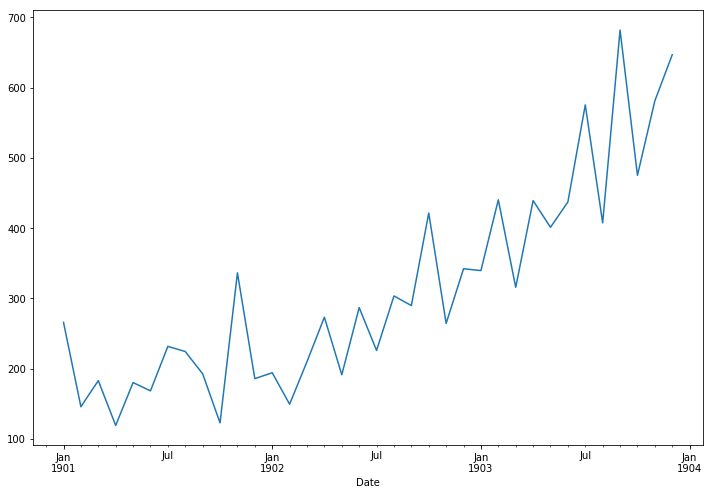

In [110]:
%matplotlib inline
series['Sales of shampoo over a three year period'].plot(figsize=(12,8))

In [83]:
sm.stats.durbin_watson(series['Sales of shampoo over a three year period'])

0.09548538187456361

<H3> Auto correlation and Partial correlation plots</H3>

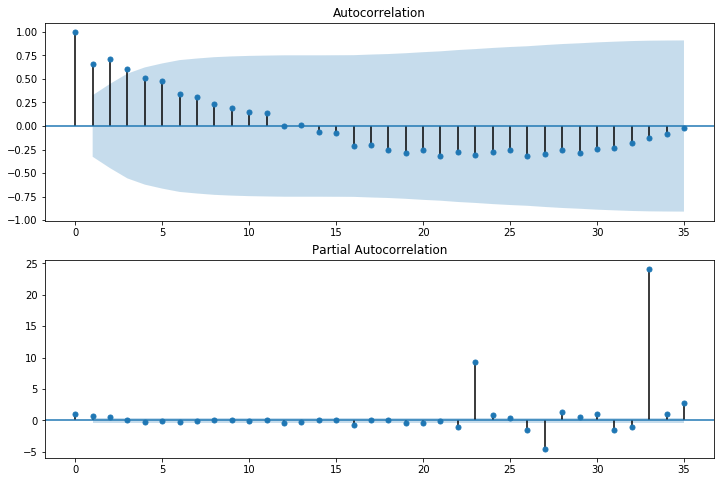

In [90]:
%matplotlib inline
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(series['Sales of shampoo over a three year period'].values.squeeze(), lags=35, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(series['Sales of shampoo over a three year period'], lags=35, ax=ax2)

<H4>There is a positive correlation with the first 10-to-12 lags that is perhaps significant for the first 5 lags.
First, we fit an ARIMA(5,0,0) model. This sets the lag value to 5 for autoregression, uses a difference order of 0 to make the time series stationary, and uses a moving average model of 0.
</H4>

<H3> ARIMA Model </H3>

In [117]:
from statsmodels.tsa.arima_model import ARIMA

In [154]:
model = sm.tsa.ARMA(series, order=(5,0,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())


C:\Users\ARVIND\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\ARVIND\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
C:\Users\ARVIND\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
C:\Users\ARVIND\Anaconda3\lib\site-packages\scipy\signal\

                                          ARMA Model Results                                         
Dep. Variable:     Sales of shampoo over a three year period   No. Observations:                   36
Model:                                            ARMA(5, 0)   Log Likelihood                -206.709
Method:                                              css-mle   S.D. of innovations             72.628
Date:                                       Tue, 05 Feb 2019   AIC                            427.419
Time:                                               21:12:48   BIC                            438.504
Sample:                                           01-01-1901   HQIC                           431.288
                                                - 12-01-1903                                         
                                                      coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------

In [138]:
print(model_fit.params)

const                                              379.453263
ar.L1.Sales of shampoo over a three year period      0.084272
ar.L2.Sales of shampoo over a three year period      0.656642
ar.L3.Sales of shampoo over a three year period      0.250505
ar.L4.Sales of shampoo over a three year period     -0.040588
ar.L5.Sales of shampoo over a three year period      0.009746
dtype: float64


<H3> Residual errors </H3>

In [150]:
residue = model_fit.resid
stats.normaltest(residue)

NormaltestResult(statistic=0.2940042574471746, pvalue=0.8632921397040229)

In [151]:
print(residue.describe())

count     36.000000
mean      13.170664
std       76.523021
min     -139.360798
25%      -35.306875
50%       18.954359
75%       42.071515
max      158.652520
dtype: float64


<H3> MSE between predicted and actual value. </H3>

In [152]:
from sklearn.metrics import mean_squared_error

X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

predicted=349.117712, expected=342.300000
predicted=306.512952, expected=339.700000
predicted=387.376449, expected=440.400000
predicted=348.154255, expected=315.900000
predicted=386.308818, expected=439.300000
predicted=356.082087, expected=401.300000
predicted=446.379462, expected=437.400000
predicted=394.737224, expected=575.500000
predicted=434.915402, expected=407.600000
predicted=507.923547, expected=682.000000
predicted=435.482779, expected=475.300000
predicted=652.743826, expected=581.300000
predicted=546.343519, expected=646.900000
Test MSE: 6958.324


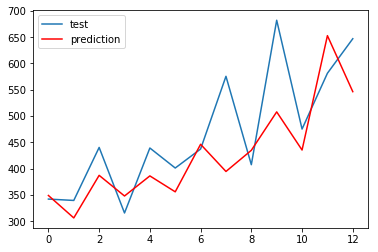

In [153]:
# plot
plt.plot(test)
plt.plot(predictions, color='red')
plt.legend(['test','prediction'])
plt.show()